In [1]:
# %reset
# Para visualización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
from IPython.display import Audio, Markdown, Image
import pylab
import seaborn as sns

# Números y Datos
import numpy as np
import pandas as pd

# Archivos
import urllib.request
import glob

# Análisis de sonido
import spotipy 

# Machine learning
# importar los paquetes para clustering
from sklearn.preprocessing import StandardScaler

# To work with categorical types
from pandas.api.types import CategoricalDtype

# Clustering (scipy)
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

# Clustering (sklearn)
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics.pairwise import euclidean_distances

from funciones import plot_silhouette
from funciones import plot_silhouettes_and_sses
from funciones import get_silhouette_avg
from funciones import get_sse
from funciones import vanDongen

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import MDS, Isomap, SpectralEmbedding, TSNE

from umap import UMAP

from sklearn.cluster import AgglomerativeClustering

In [2]:
metadata = pd.read_csv('../data/metadata.csv', index_col='id')
audio_features = pd.read_csv('../data/audio_features.csv', index_col='id')
audio_analysis = pd.read_csv('../data/audio_analysis.csv', index_col='id')

audio_features = audio_features[['acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness','loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]

# Para que las comparaciones sean del mismo largo,
# se remueve de audio_feature y metadata el track que no se encuentra en audio_analysis
merged = audio_features.merge(audio_analysis, how = 'left', on = 'id')
id_to_remove = merged[merged.timbre_mean_0.isnull()].index[0]

audio_features = audio_features.drop(id_to_remove, axis = 0)

audio_tracks = pd.merge(audio_features, audio_analysis, how = 'inner', on = 'id')
metadata = metadata.drop(id_to_remove, axis = 0)

# Se ordenan los datasets para que los tracks estén en el mismo orden
audio_features = audio_features.sort_index()
audio_analysis = audio_analysis.sort_index()
audio_tracks = audio_tracks.sort_index()
metadata = metadata.sort_index()

In [3]:
scalerMinMax = MinMaxScaler(feature_range=(0,1))
standardScaler = StandardScaler()

In [4]:
corridas = pd.read_csv('hierarchical.csv')

In [5]:
corridas.head()

,Dataset,Method,Metric,Scaler,Cophenet,vanDongen,adjRand
0,audio_features,single,braycurtis,minMax,0.317106,0.997709,0.000049
1,audio_features,single,braycurtis,standard,0.102797,0.997709,0.000049
2,audio_features,complete,braycurtis,minMax,0.607225,0.935654,0.019142
3,audio_features,complete,braycurtis,standard,0.346391,0.935654,0.019142
4,audio_features,average,braycurtis,minMax,0.670574,0.954740,0.012020


In [6]:
len(corridas)

366

In [21]:
corridas.sort_values(by=["Cophenet"], ascending = False)

,Dataset,Method,Metric,Scaler,Cophenet,vanDongen,adjRand
132,audio_analysis,average,canberra,minMax,0.767256,0.998858,-0.000184
126,audio_analysis,average,braycurtis,minMax,0.761583,0.998299,-0.000224
128,audio_analysis,single,canberra,minMax,0.760386,0.997709,-0.000069
122,audio_analysis,single,braycurtis,minMax,0.755941,0.997710,-0.000037
168,audio_analysis,average,euclidean,minMax,0.747303,0.879210,0.046009
206,audio_analysis,average,minkowski,minMax,0.747303,0.879210,0.046009
156,audio_analysis,average,cosine,minMax,0.744705,0.731664,0.115078
135,audio_analysis,single,chebyshev,standard,0.741269,0.998855,-0.000079
225,audio_analysis,average,seuclidean,standard,0.740272,0.997710,0.000019
169,audio_analysis,average,euclidean,standard,0.740272,0.879210,0.046009


In [23]:
corridas.loc[corridas['Cophenet'] < 0.71].sort_values(by=["Cophenet"], ascending = False)

,Dataset,Method,Metric,Scaler,Cophenet,vanDongen,adjRand
239,audio_analysis,single,sqeuclidean,standard,0.706504,0.998282,-0.000020
84,audio_features,average,minkowski,minMax,0.704239,0.985572,0.001566
46,audio_features,average,euclidean,minMax,0.704239,0.985572,0.001566
140,audio_analysis,single,cityblock,minMax,0.701561,0.998282,-0.000020
220,audio_analysis,single,seuclidean,minMax,0.699583,0.998282,-0.000020
28,audio_features,average,correlation,minMax,0.695841,0.987512,0.001622
121,audio_features,average,sqeuclidean,standard,0.695500,0.985572,0.001566
120,audio_features,average,sqeuclidean,minMax,0.694909,0.985572,0.001566
139,audio_analysis,average,chebyshev,standard,0.693755,0.904523,0.037695
238,audio_analysis,single,sqeuclidean,minMax,0.692765,0.998282,-0.000020


In [7]:
# ¿Cuál es la corrida con menor Van Dongen?
corridas.loc[corridas['vanDongen'].idxmin()]

Dataset      audio_tracks
Method           complete
Metric           canberra
Scaler             minMax
Cophenet         0.426005
vanDongen        0.628838
adjRand           0.22505
Name: 252, dtype: object

0.5074901479861822

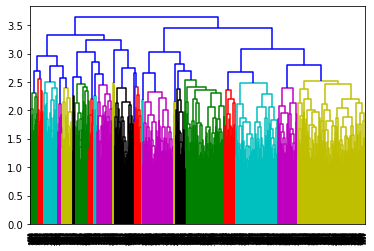

In [8]:
df = audio_tracks
method = 'complete'
metric = 'euclidean'
scaler = scalerMinMax

df_norm = scaler.fit_transform(df)

z = linkage(df_norm, method = method, metric = metric)
plt.figure()
dn = dendrogram(z)
c, coph_dists = cophenet(z, pdist(df_norm))
c

In [9]:
cluster = AgglomerativeClustering(n_clusters=22, affinity=metric, linkage=method)
cluster.fit_predict(df_norm)

tmp = pd.DataFrame({'Generos': metadata.genre, 'df': cluster.labels_})
ct = pd.crosstab(tmp['Generos'], tmp['df'])
ct

df,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Generos,,,,,,,,,,,,,,,,,,,,,
ambient,28,23,9,35,22,40,47,50,26,5,...,9,5,56,11,24,51,5,3,2,6
classical,36,36,26,44,1,0,34,40,24,6,...,4,2,58,36,16,8,1,0,7,22
drum-and-bass,0,0,0,0,205,223,0,0,0,0,...,20,0,1,0,0,2,0,0,0,0
jazz,7,137,3,10,18,64,5,6,0,82,...,56,2,5,6,0,6,0,0,10,1
world-music,29,70,4,6,33,115,7,8,4,111,...,40,4,1,3,8,5,0,1,6,2


In [10]:
vanDongen(ct)

0.7514978601997147

In [11]:
# ¿Cuál es la corrida con mayor adjRand?
corridas.loc[corridas['adjRand'].idxmax()]

Dataset      audio_analysis
Method                 ward
Metric            euclidean
Scaler               minMax
Cophenet           0.337479
vanDongen          0.647235
adjRand            0.229475
Name: 170, dtype: object

0.3374788987171185

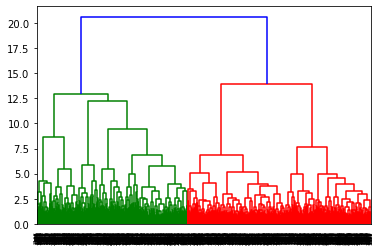

In [12]:
df = audio_analysis
method = 'ward'
metric = 'euclidean'
scaler = scalerMinMax

df_norm = scaler.fit_transform(df)

z = linkage(df_norm, method = method, metric = metric)
plt.figure()
dn = dendrogram(z)
c, coph_dists = cophenet(z, pdist(df_norm))
c

In [13]:
cluster = AgglomerativeClustering(n_clusters=2, affinity=metric, linkage=method)
cluster.fit_predict(df_norm)

tmp = pd.DataFrame({'Generos': metadata.genre, 'df': cluster.labels_})
ct = pd.crosstab(tmp['Generos'], tmp['df'])
ct

df,0,1
Generos,,
ambient,93,367
classical,33,372
drum-and-bass,436,15
jazz,354,72
world-music,294,169


In [14]:
# ¿Cuál es la corrida con mayor índice cofenético?
corridas.loc[corridas['Cophenet'].idxmax()]

Dataset      audio_analysis
Method              average
Metric             canberra
Scaler               minMax
Cophenet           0.767256
vanDongen          0.998858
adjRand        -0.000184029
Name: 132, dtype: object

0.7672563992662839

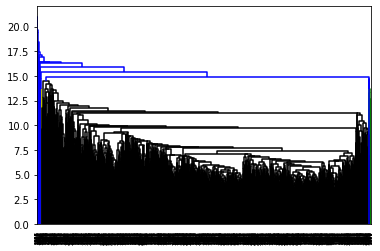

In [29]:
df = audio_analysis
method = 'average'
metric = 'canberra'
scaler = scalerMinMax

df_norm = scaler.fit_transform(df)

z = linkage(df_norm, method = method, metric = metric)
plt.figure()
dn = dendrogram(z)
c, coph_dists = cophenet(z, pdist(df_norm))
c

In [30]:
cluster = AgglomerativeClustering(n_clusters=2, affinity=metric, linkage=method)
cluster.fit_predict(df_norm)

tmp = pd.DataFrame({'Generos': metadata.genre, 'df': cluster.labels_})
ct = pd.crosstab(tmp['Generos'], tmp['df'])
ct

df,0,1
Generos,,
ambient,459,1
classical,405,0
drum-and-bass,451,0
jazz,426,0
world-music,463,0


In [31]:
vanDongen(ct)

0.9994262765347103

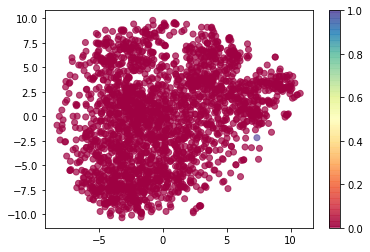

In [32]:
tsne = TSNE(n_components=2,perplexity=200)
Xred = tsne.fit_transform(df_norm)
plt.scatter(Xred[:,0], Xred[:,1], c=cluster.labels_, cmap=plt.cm.Spectral, alpha=0.7)
plt.colorbar()

0.747302625630334

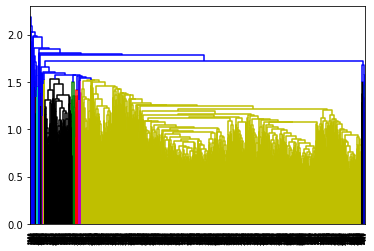

In [25]:
# Otra prueba
df = audio_analysis
method = 'average'
metric = 'euclidean'
scaler = scalerMinMax

df_norm = scaler.fit_transform(df)

z = linkage(df_norm, method = method, metric = metric)
plt.figure()
dn = dendrogram(z)
c, coph_dists = cophenet(z, pdist(df_norm))
c

In [27]:
cluster = AgglomerativeClustering(n_clusters=15, affinity=metric, linkage=method)
cluster.fit_predict(df_norm)

tmp = pd.DataFrame({'Generos': metadata.genre, 'df': cluster.labels_})
ct = pd.crosstab(tmp['Generos'], tmp['df'])
ct

df,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Generos,,,,,,,,,,,,,,,
ambient,418,24,4,2,0,4,0,1,1,0,0,1,1,0,4
classical,392,1,0,1,0,3,2,0,0,1,0,0,3,0,2
drum-and-bass,451,0,0,0,0,0,0,0,0,0,0,0,0,0,0
jazz,423,0,0,0,1,0,1,0,0,0,0,0,0,1,0
world-music,452,4,2,0,1,0,1,0,0,0,1,0,1,0,1
